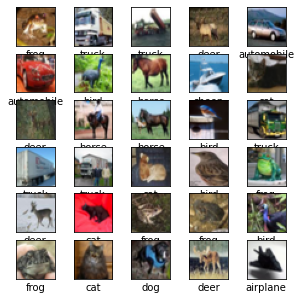

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.datasets import cifar10

np.random.seed(777)

(x_train, t_train), (x_test, t_test) = cifar10.load_data()
class_names=['airplane', 'automobile', 'bird', 'cat',
            'deer', 'dog', 'frog', 'horse', 'sheep', 'truck']

sample_size = 30
random_idx = np.random.randint(60000, size = sample_size)

plt.figure(figsize = (5,5))
for i, idx in enumerate(random_idx):
    plt.subplot(6, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i])
    plt.xlabel(class_names[int(t_train[i])])
plt.show()

In [9]:
x_mean = np.mean(x_train, axis=(0,1,2))
x_std = np.std(x_train, axis=(0,1,2))

x_train = (x_train - x_mean) / x_std
x_test = (x_test - x_mean) / x_std

from sklearn.model_selection import train_test_split
x_train, x_val, t_train, t_val = train_test_split(x_train, t_train, test_size = 0.33, random_state = 777)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam

model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = 3, padding = 'same',
                activation = 'relu', input_shape = (32, 32, 3)))
model.add(Conv2D(filters = 32, kernel_size = 3, padding = 'same',
                activation = 'relu'))
model.add(MaxPool2D(pool_size = (2, 2), strides = 2, padding = 'same'))
model.add(Conv2D(filters = 64, kernel_size = 3, padding = 'same',
                activation = 'relu'))
model.add(Conv2D(filters = 64, kernel_size = 3, padding = 'same',
                activation = 'relu'))
model.add(MaxPool2D(pool_size = (2, 2), strides = 2, padding = 'same'))
model.add(Conv2D(filters = 128, kernel_size = 3, padding = 'same',
                activation = 'relu'))
model.add(Conv2D(filters = 128, kernel_size = 3, padding = 'same',
                activation = 'relu'))
model.add(MaxPool2D(pool_size = (2, 2), strides = 2, padding = 'same'))
model.add(Flatten())
model.add(Dense(256, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

model.compile(optimizer = 'Adam', loss = 'sparse_categorical_crossentropy', metrics = ['acc'])


In [ ]:
'''
1. 데이터셋 로드
2. 데이터 전처리 -> x_train, x_test, t_train, t_test
                -> seed 등등...
3. x_train, x_test, t_train, t_test 나눠주기 -> / 255 or mean&std 등등...
                -> train_test_spilt해주기 -> x_val, t_val 생성
4. Sequential, add 해주기
5. compile
6. fit(history)
'''